<a href="https://colab.research.google.com/github/james-lucius/qureca_ADEQUATE/blob/main/M9_2132_QNNs_2_1_3_Building_a_QNN_Exercises_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://gitlab.com/qworld/qeducation/educational-materials/adequate-qbook1/raw/main/qworld/images/adq_1.png" align="left" width=450>

_prepared by Claudia Zendejas-Morales_

### 2.1.3 Building a QNN Exercises Solutions

##### <font color="#08b806">Please run the following (hidden) cell; it is required to set up the environment for Google Colab

In [1]:
import IPython

def in_colab():
    try:
        import google.colab
        return True
    except:
        return False

if in_colab():
    !pip install qiskit[visualization]==1.4.2 &> /dev/null # use "&> /dev/null" so that the standard output of the installation is not displayed

<a name="task1"></a>
## Task 1

Create a function that generates a quantum circuit in Qiskit, encoding $2n$ features using $n$ qubits with rotations; that is, it will ultimately return an **angle encoding** feature map.

Let us recall the image at the end of the "2.1.1 Angle (Rotation) Encoding" section:

<center>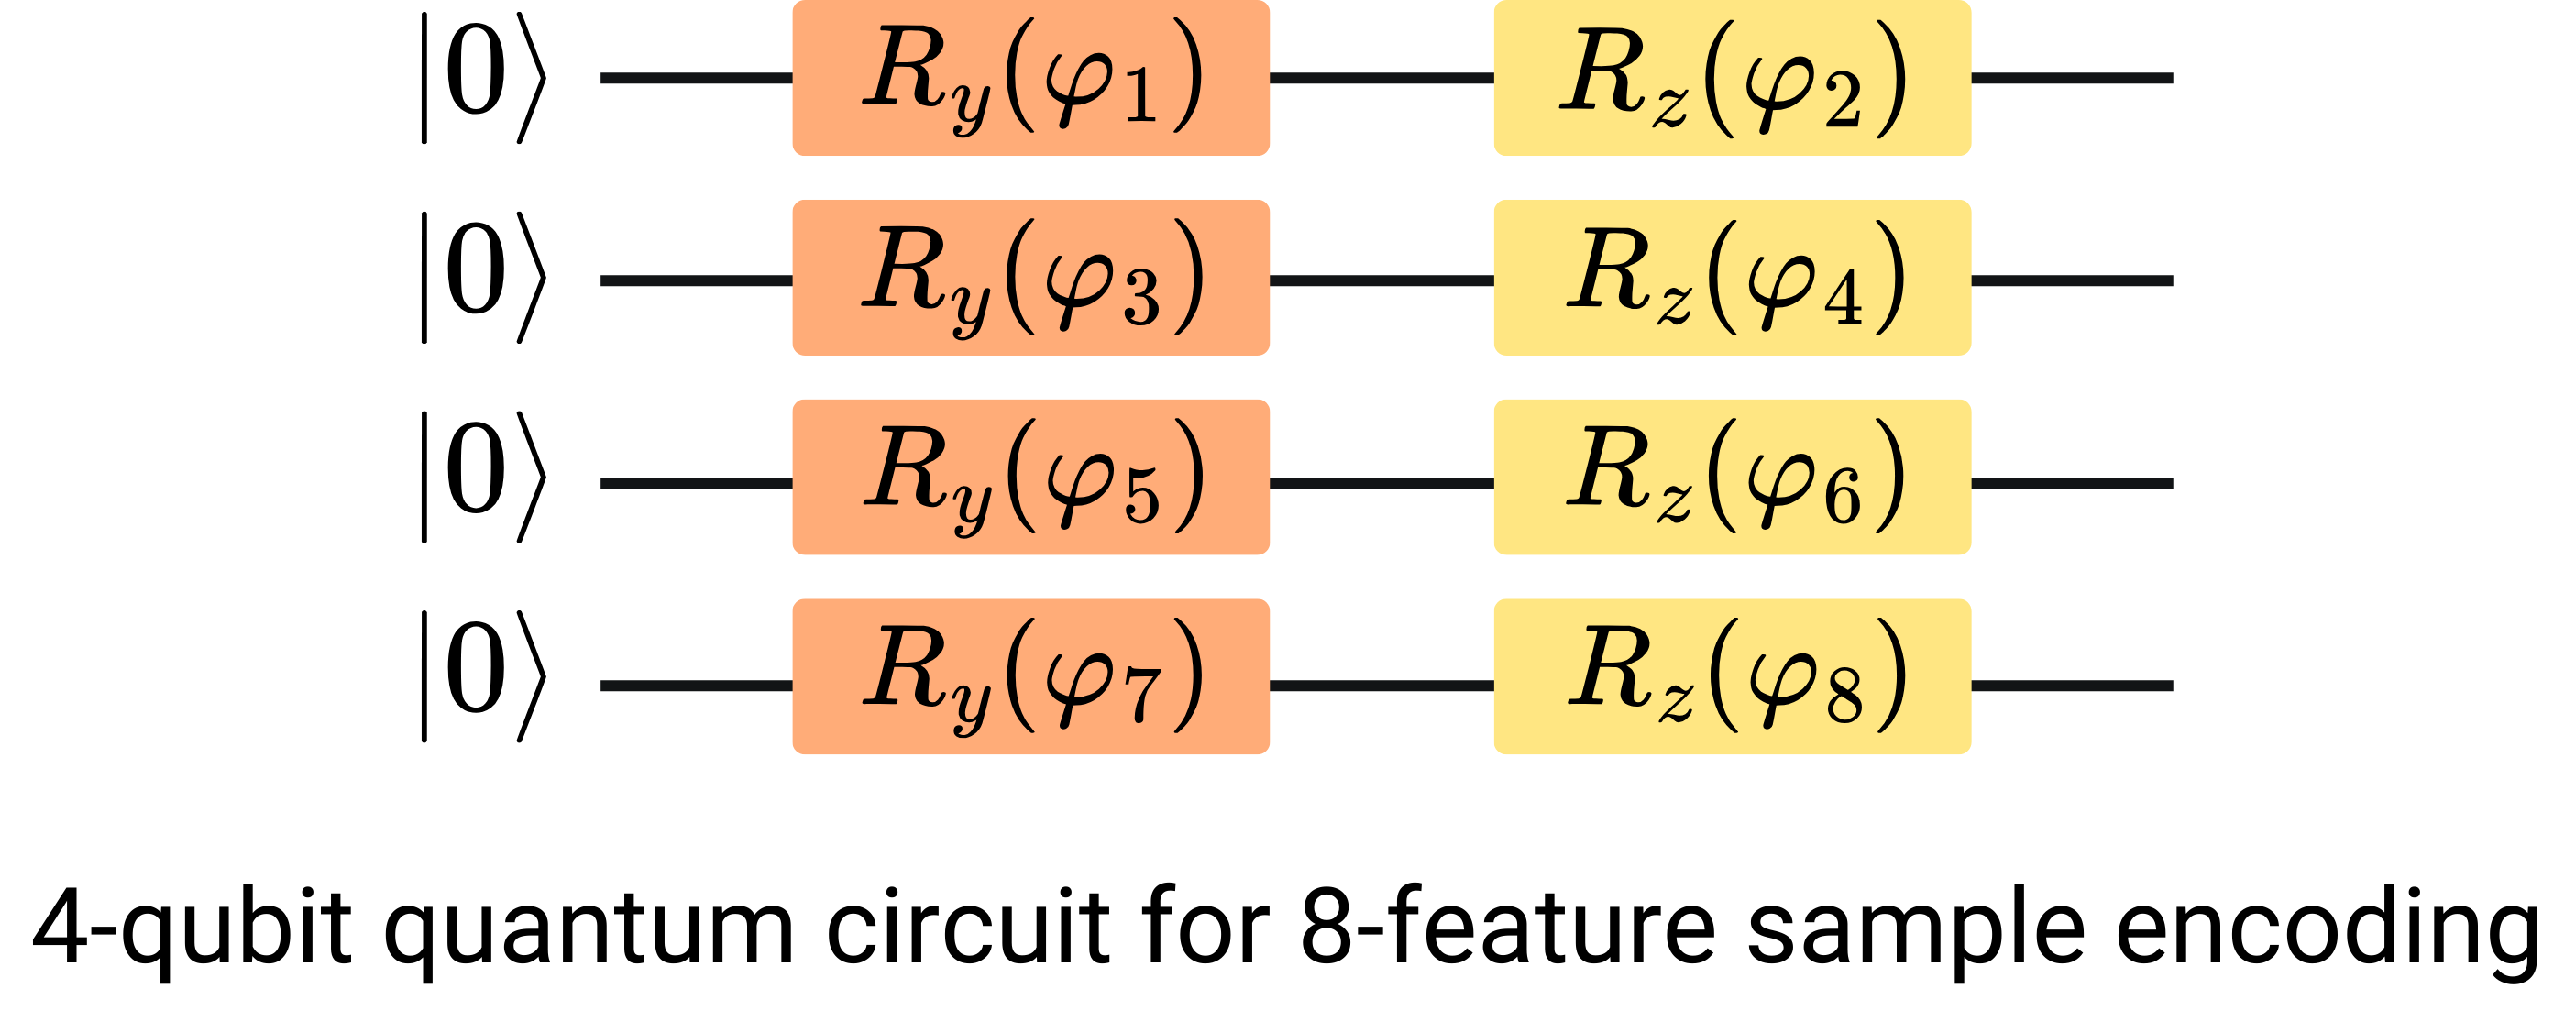

Don't forget that the feature vector must be normalized to be in the range $[0, \pi]$.

### Solution

In [2]:
import math

# Normalize the features to lie in [0, π], according to the formula:
#    phi_i = ((x_i - x_i^min) / (x_i^max - x_i^min)) * pi
def normalize_features(features):

  # find the minimum and maximum of the vector
  x_min = min(features)
  x_max = max(features)

  # normalize in [0, π]
  norm_features = []
  denom = x_max - x_min
  for val in features:
      if abs(denom) < 1e-12:
          # case where all features are equal => 0 is assigned
          norm_features.append(0.0)
      else:
          phi = (val - x_min) / denom * math.pi
          norm_features.append(phi)

  return norm_features

In [3]:
from qiskit import QuantumCircuit

# Encode a vector of features (of length k) into n qubits as follows:
#   1) Normalize each feature to the range [0, π]
#   2) Each qubit i receives two angles:
#     - features[2*i] => R_y
#     - features[2*i+1] => R_z
#   3) If the number of features (k) is odd, the last remaining feature is applied as R_y to the last qubit
def angle_encoding_2n(features):

  n_qubits = (len(features) + 1) // 2         # calculate the number of qubits needed

  qc = QuantumCircuit(n_qubits)

  k = len(features)
  num_pairs = k // 2

  features = normalize_features(features)

  # we loop through each pair and insert R_y and R_z
  for i in range(num_pairs):
      if i < n_qubits:
          qc.ry(features[2*i], i)             # even index => R_y
          qc.rz(features[2*i + 1], i)         # odd index => R_z

  # If k is odd, 1 feature is left over => apply additional R_y
  if k % 2 == 1:
      leftover_qubit = num_pairs              # the next qubit after the 'num_pairs'
      qc.ry(features[-1], leftover_qubit)

  return qc

Let's test the function:

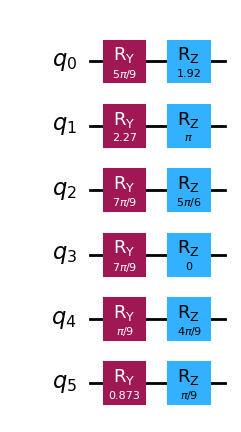

In [4]:
import random

k = 12                                                # 6 qubits will be needed
feats = [random.randint(-10, 10) for _ in range(k)]

angle_encoding_2n(feats).draw('mpl')

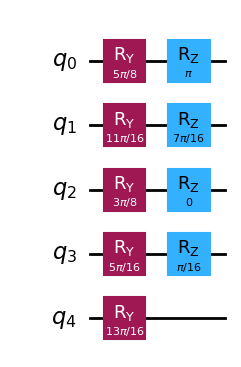

In [5]:
k = 9                                                # 5 qubits will be needed
feats = [random.randint(-10, 10) for _ in range(k)]

angle_encoding_2n(feats).draw('mpl')

<a name="task2"></a>
## Task 2 (on paper)

Using **basis encoding**, find the state that represents the classical dataset containing the following two data points:

$$x^1=01\quad\quad;\quad\quad x^2=11$$

### Solution

Let us remember that an entire dataset, with $M$ samples, can be represented in superpositions of computational basis states as

$$|D\rangle=\frac{1}{\sqrt{M}}\;\sum _{j=1}^M|\vec{x}^j\rangle$$

In this example, $M=2$.

Thus, the state representing the data set, given the indicated samples (or data points), will be:

$$|D\rangle=\frac{1}{\sqrt{2}}\;|01\rangle+\frac{1}{\sqrt{2}}\;|11\rangle$$

<a name="task3"></a>
## Task 3

The Qiskit framework has an implementation of the **ZZ Feature Map**; you can check it out [here](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.ZZFeatureMap).

Explore this class, which returns a quantum circuit with this feature map implementation. Try it with $n=3, 5, 10$.

Use `reps=1` to check the gates more easily.

What happens if you change the `entanglement` parameter? What are the options for this parameter?

### Solution

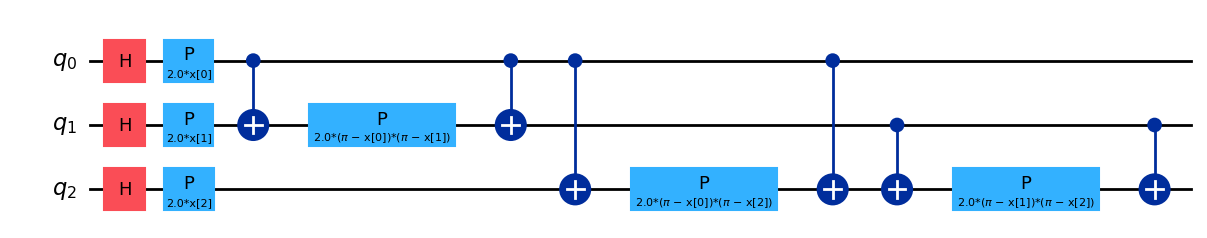

In [6]:
from qiskit.circuit.library import ZZFeatureMap

feat_map3 = ZZFeatureMap(3, reps=1)
feat_map3.decompose().draw('mpl')

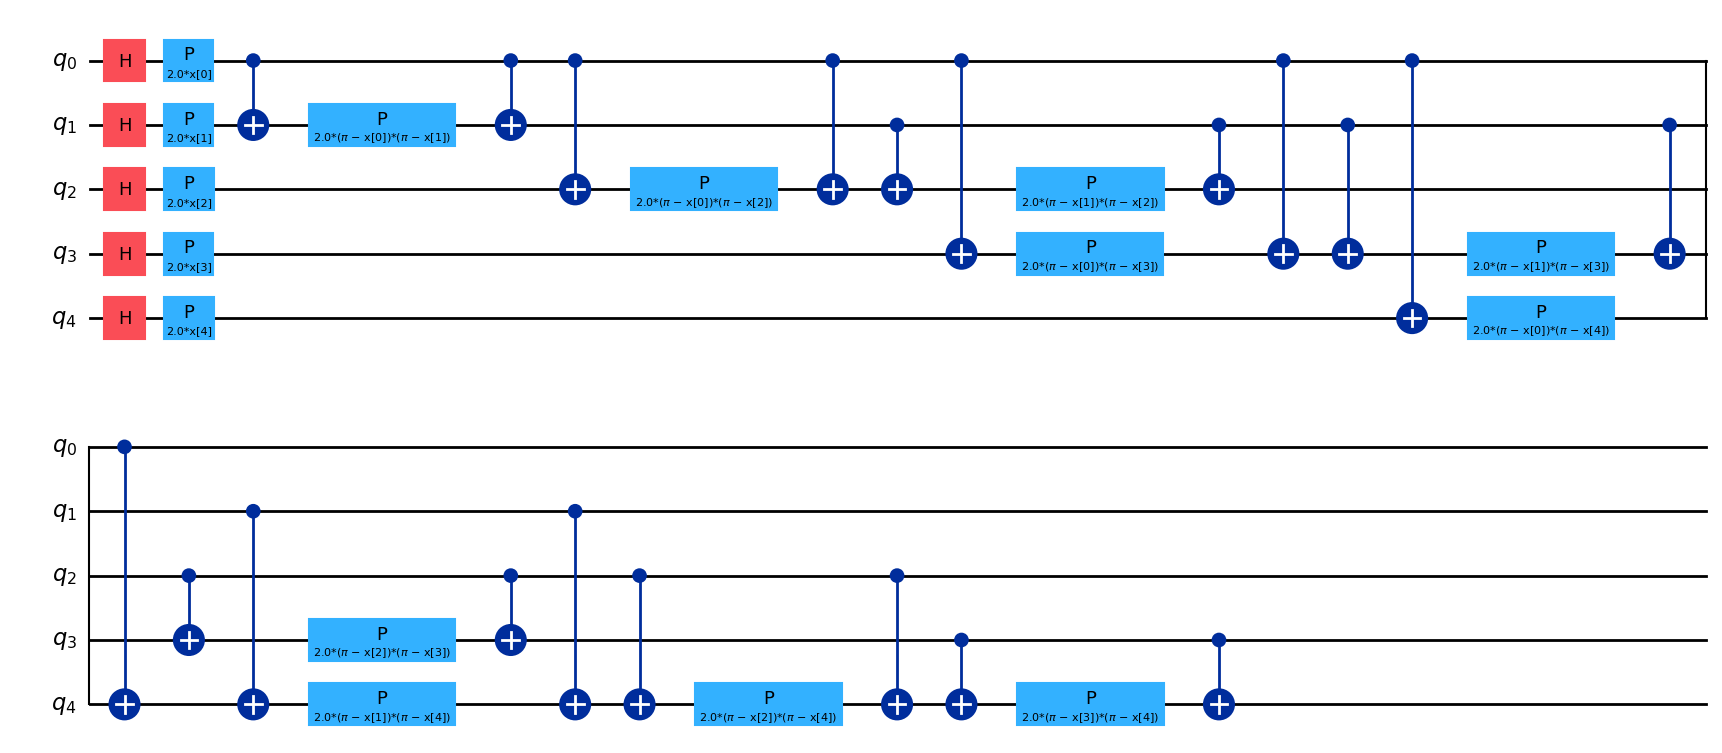

In [7]:
feat_map5 = ZZFeatureMap(5, reps=1)
feat_map5.decompose().draw('mpl')

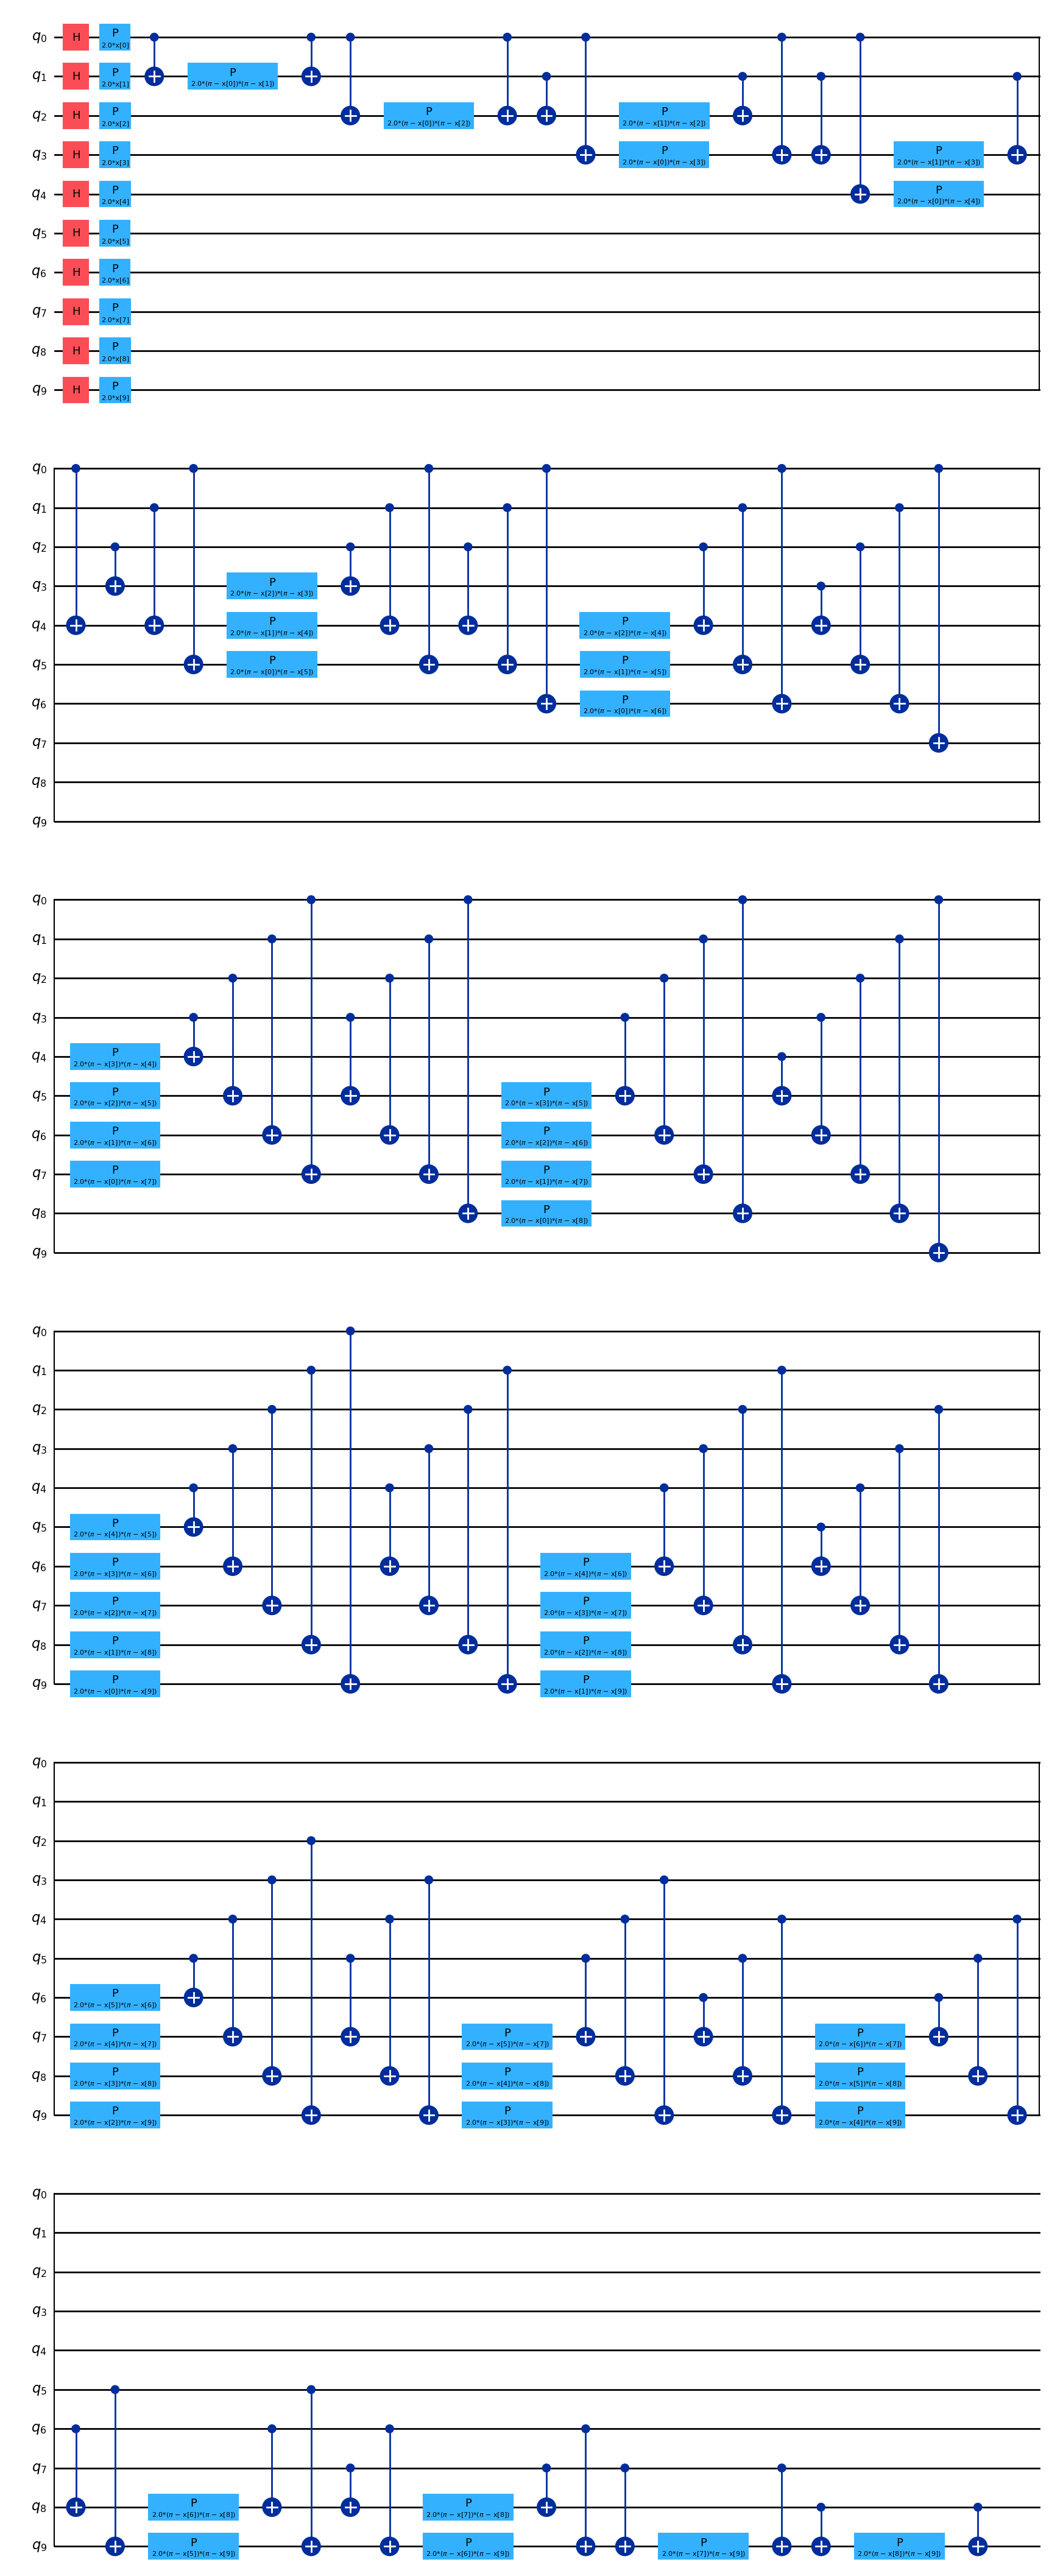

In [8]:
feat_map10 = ZZFeatureMap(10, reps=1)
feat_map10.decompose().draw('mpl')

The `entanglement` parameter can be specified with the options: `'full'` (default), `'linear'`, `'reverse_linear'`, `'circular'`, or `'sca'`.

You can also specify your own structure by specifying a dictionary.

For example, with $n=3$ and `entanglement='linear'`, we get:

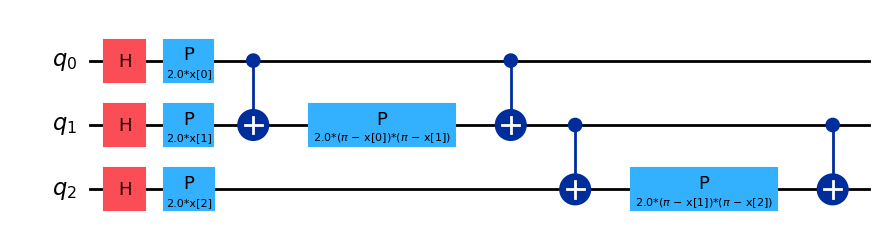

In [9]:
feat_map3_linear = ZZFeatureMap(3, reps=1, entanglement='linear')
feat_map3_linear.decompose().draw('mpl')

We observe that the circuit is less complex than when the default value was left (`entanglemen='full'`).

<a name="task4"></a>
## Task 4

Write a function in Qiskit that generates the **two-local** ansatz for $n$ qubits, with $k$ layers and the parameters $\boldsymbol{\theta}$, the three values received as arguments.

Let us recall the image of the "2.1.2 Two-Local Ansatz" section:

<center>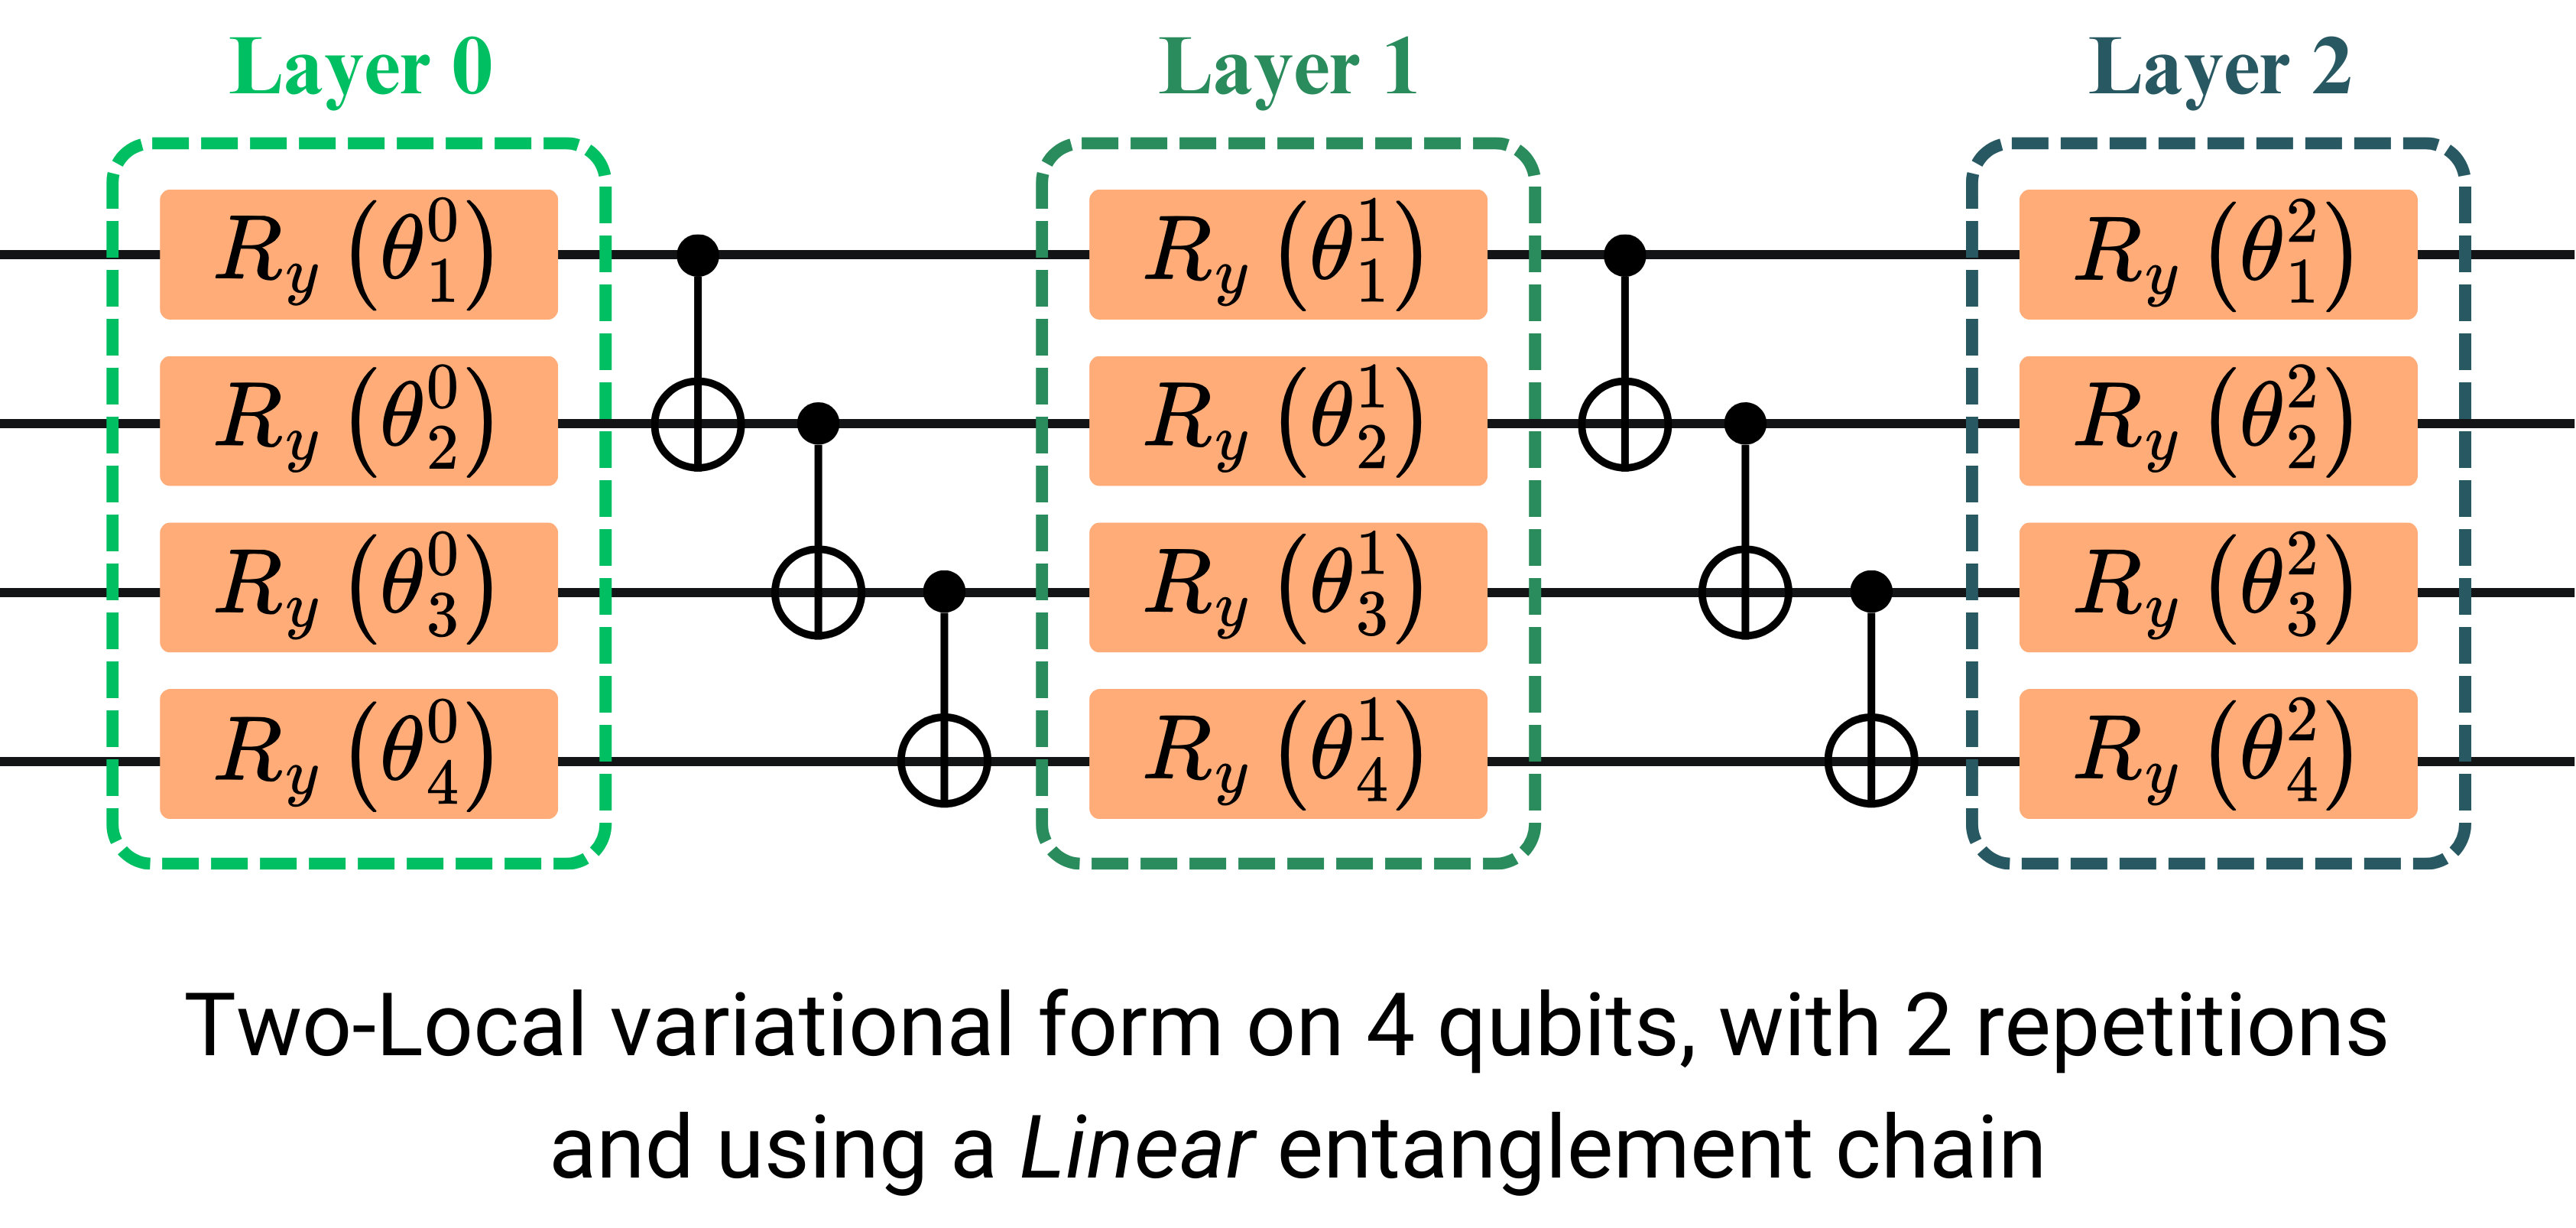

### Solution

Let us recall the procedure for generating the two-local ansatz:

---
>Procedure **TwoLocal**($n, k, \boldsymbol{\theta}$):
>><u>for</u> $l = 0$ <u>to</u> $k$ <u>do</u>
>>
>>>$\triangleright$ Add the $l$-th layer of single-qubit rotations
<br>
>>><u>for</u> $j = 1$ <u>to</u> $n$ <u>do</u>
>>>>Apply $R_Y(\theta_{j}^l)$ on qubit $j$
>>>>
>>>$\triangleright$ Create entanglement between layers
<br>
>>><u>if</u> $l < k$ <u>then</u>
>>>><u>for</u> $t = 1$ <u>to</u> $n - 1$ <u>do</u>
>>>>>Apply a CNOT gate with control on qubit $t$ and target on qubit $t + 1$
---

In [10]:
from qiskit import QuantumCircuit

# Using a two-local ansatz, it encodes a vector of theta parameters (of length n*(k+1))
# into n qubits with k layers
def TwoLocal(n, k, theta):

  qc = QuantumCircuit(n)

  for l in range(k + 1):              # the variable l ranges from 0 to k (inclusive)

    for j in range(n):                # the variable j ranges from 0 to n (exclusive), acting on exactly n qubits
      qc.ry(theta[l * n + j], j)

    if l < k:                         # if it is not the last layer, no entanglement gates should be added

      for t in range(n - 1):          # the variable t ranges from 0 to n-1 (exclusive)
        qc.cx(t, t + 1)

      qc.barrier()                    # add barrier for display purposes (distinguish each layer)

  return qc

Let's test the function:

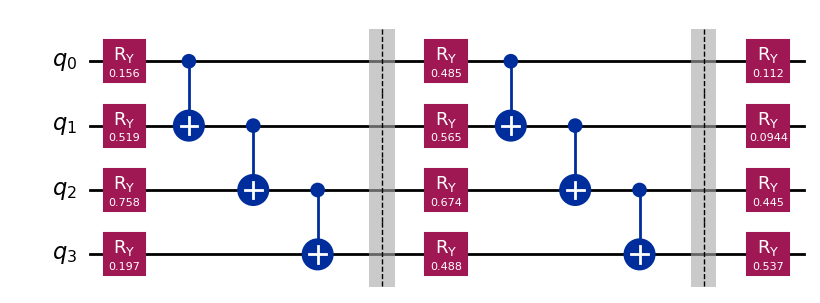

In [11]:
import random

n = 4                           # number of qubits
k = 2                           # number of layers
tot_params = n * (k + 1)        # number of parameters to encode

theta = [random.random() for _ in range(tot_params)]

TwoLocal(n, k, theta).draw('mpl')

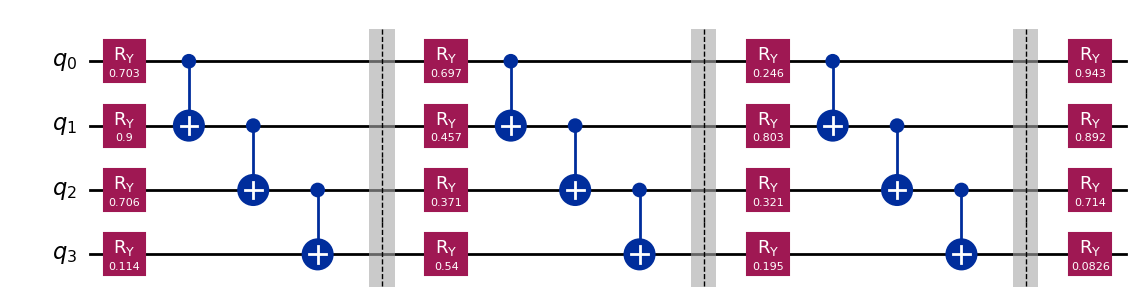

In [12]:
n = 4                           # number of qubits
k = 3                           # number of layers
tot_params = n * (k + 1)        # number of parameters to encode

theta = [random.random() for _ in range(tot_params)]

TwoLocal(n, k, theta).draw('mpl')